# Table of Contents

### 01. Importing Libraries
### 02. Importing Dataframe
### 03.  Data Privacy
### 04. Creating Regions: Northeast, Midwest, West, South
### 05. Comparing Regions
### 06. Creating Exclusion Flags
### 07. Creating Customer Profiles
>#### a. Age Profile
>#### b. Parental Age Profile
>#### c. Single Parent Profile
>#### d. Income Profile
>#### e. Gender Profile
>#### f. Relationship-Age Profile
>#### g. Organic Shopper Profile
### 08. Creating Department Profiles
>#### a. Alcohol Profile
>#### b. Baby Profile
>#### c. Pet Profile
### 09. Customer Profile Visualizations
>#### a. Age Profile
>#### b. Parental Age Profile
>#### c. Single Parent Profile
>#### d. Income Profile
>#### e. Gender Profile
>#### f. Relationship-Age Profile
>#### g. Organic Shopper Profile
### 10. Department Profile Visualizations
>#### a. Alcohol Profile
>#### b. Baby Profile
>#### c. Pet Profile
### 10. Comparison Visualizations
>#### a. Region Distribution
>#### b. Order Frequency Distribution
>#### c. Price Range Distribution
### 11. Basic Visualizations
>#### a. Departments
>#### b. Product Price Range
>#### c. Customer Loyalty
>#### d. Customer Spending
>#### e. Order Frequency
### 12. Export Final Dataset

# 01. Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

# 02. Importing Dataframe

In [11]:
#path= project pathway
path= r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 4/InstaCart Basket Analysis'

In [12]:
#completely combined dataframe
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_2.pkl'))

In [13]:
df.shape

(32404859, 32)

In [14]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int8   
 3   orders_day_of_the_week  int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float64
 6   new_customer            bool   
 7   product_id              int32  
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  product_name            object 
 11  aisle_id                int16  
 12  department_id           int8   
 13  prices                  float64
 14  price_range_loc         object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  average_price           float64
 20  spending_flag           object 
 21  median_order_frequency  float

# 03. Data Privacy

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [16]:
#address PII
df= df.drop(columns=['first_name', 'last_name'])

In [17]:
#check that columns were successfully dropped
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_order_frequency',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

# 04. Creating Regions: Northeast, Midwest, West, South

### Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [18]:
#create a region columm based on 'state' column
result= []

for value in df['state']:
    if value in('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('North East')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')

In [19]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [20]:
#create regions column based on result output
df['region']=result

In [21]:
#check frequency
df['region'].value_counts()

South         10791885
West           8292913
Midwest        7597325
North East     5722736
Name: region, dtype: int64

# 05. Comparing Regions

### Determine whether there's a difference in spending habits between different U.S. regions

In [22]:
#create a crosstab to compare region and spending flag
crosstab= pd.crosstab(df['region'], df['spending_flag'], dropna=False)

In [23]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
North East,108225,5614511
South,209691,10582194
West,160354,8132559


#### The South has the highest number of low and high spenders, which can be attributed to the fact that there are more southern states, and therefore southern customers. 

In [24]:
#Number of states per region
df.groupby('region')['state'].nunique()

region
Midwest       12
North East     9
South         17
West          13
Name: state, dtype: int64

In [25]:
#Number of customers per region
df.groupby('region')['user_id'].nunique()

region
Midwest       48519
North East    36388
South         68737
West          52565
Name: user_id, dtype: int64

#### The above confirms that the South has more states and customers that contribute to the higher number of customers, both high and low spenders

# 06. Creating Exclusion Flags

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [26]:
#create exclusion flag
df.loc[df['max_order']<5, 'activity']= 'low_activity'
df.loc[df['max_order']>=5, 'activity']= 'active'

In [27]:
df['activity'].value_counts(dropna=False)

active          30964564
low_activity     1440295
Name: activity, dtype: int64

In [28]:
#create a dataset of customers with orders lower than 5
low_activity= df[df['activity']== 'low_activity']

In [29]:
#create a dataset of customers with orders above 5
active= df[df['activity']== 'active']

In [30]:
pd.set_option('display.max_columns', None)
active.head(200)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regular Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2808909,19,4,5,12,5.0,False,2192,10,1,Bold & Crispy Zesties! Crispy Seasoned French ...,129,1,12.8,Mid-range product,Regular Days,Average orders,9,New customer,8.372059,Low spender,6.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,active
196,1973799,19,5,6,12,8.0,False,2192,14,1,Bold & Crispy Zesties! Crispy Seasoned French ...,129,1,12.8,Mid-range product,Regular Days,Average orders,9,New customer,8.372059,Low spender,6.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,active
197,532817,19,7,4,17,6.0,False,2192,33,1,Bold & Crispy Zesties! Crispy Seasoned French ...,129,1,12.8,Mid-range product,Slowest Days,Average orders,9,New customer,8.372059,Low spender,6.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,active
198,1321974,19,1,6,13,NaN,True,13822,23,0,Super Soft Flour Tortillas,128,3,9.5,Mid-range product,Regular Days,Most orders,9,New customer,8.372059,Low spender,6.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,active


In [31]:
active

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regular Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Slowest Days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404851,2988973,106143,23,2,22,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regular Days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404852,930,106143,24,6,12,4.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regular Days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404853,467253,106143,25,6,16,7.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regular Days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active


In [32]:
active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int8   
 3   orders_day_of_the_week  int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float64
 6   new_customer            bool   
 7   product_id              int32  
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  product_name            object 
 11  aisle_id                int16  
 12  department_id           int8   
 13  prices                  float64
 14  price_range_loc         object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  average_price           float64
 20  spending_flag           object 
 21  median_order_frequency  float

In [33]:
low_activity

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity
1510,520620,120,1,3,11,NaN,True,196,2,0,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1511,3273029,120,3,2,8,19.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Regular Days,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1512,520620,120,1,3,11,NaN,True,46149,1,0,Zero Calorie Cola,77,7,13.4,Mid-range product,Slowest Days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1513,3273029,120,3,2,8,19.0,False,46149,1,1,Zero Calorie Cola,77,7,13.4,Mid-range product,Regular Days,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1514,520620,120,1,3,11,NaN,True,26348,3,0,Mixed Fruit Fruit Snacks,50,19,3.1,Low-range product,Slowest Days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404828,1947537,166751,3,4,7,0.0,False,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,47,11,3.5,Low-range product,Slowest Days,Average orders,3,New customer,3.500000,Low spender,10.0,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West,low_activity
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regular Days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Busiest Days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regular Days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity


In [34]:
#export dataset of active customers
active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [35]:
#export dataset of low_activity customers
low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [36]:
#delete low_activity dataset to reduce memory usage
del low_activity

In [37]:
#export original dataset with changes to reduce memore usage
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_3.pkl'))

In [38]:
#delete original dataset to reduce memory usage
del df

# 07. Creating Customer Profiles

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

#### a. Age Profile

In [39]:
#create age flag for different age groups
active.loc[active['age']<=25, 'age_group']= 'Young Adult'
active.loc[(active['age']>25) & (active['age']<65), 'age_group']= "Adult"
active.loc[active['age']>=65, 'age_group']= 'Senior'
active['age_group'].value_counts()

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [40]:
#aggregate for age group expenditure
active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789100  1.0  25.0
Senior       7.796715  1.0  25.0
Young Adult  7.784889  1.0  25.0

In [41]:
#aggregate for age group order frequency
active.groupby('age_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                              mean  min   max
age_group                                    
Adult                     9.971613  0.0  30.0
Senior                    9.933025  0.0  30.0
Young Adult               9.937482  0.0  30.0

#### b. Parental Age Profile

In [42]:
#create parental age flag for different groups
active.loc[(active['age']<25) & (active['number_of_dependants']>=1), 'parental_age']= 'Young Parent'
active.loc[(active['age']>=25) & (active['age']<35) & (active['number_of_dependants']>=1), 'parental_age']= 'Average-Aged Parent'
active.loc[(active['age']>=35) & (active['number_of_dependants']>=1), 'parental_age']= 'Older Parent'
active['parental_age'].value_counts()

Older Parent           17046146
Average-Aged Parent     3589053
Young Parent            2589684
Name: parental_age, dtype: int64

In [43]:
#aggregate for parental age group expenditure
active.groupby('parental_age').agg({'prices': ['mean', 'min', 'max']})

prices           
                         mean  min   max
parental_age                            
Average-Aged Parent  7.779414  1.0  25.0
Older Parent         7.792618  1.0  25.0
Young Parent         7.795841  1.0  25.0

In [44]:
#aggregate for parental age group order frequency
active.groupby('parental_age').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                      mean  min   max
parental_age                                         
Average-Aged Parent               9.996223  0.0  30.0
Older Parent                      9.975728  0.0  30.0
Young Parent                      9.842101  0.0  30.0

#### c. Single Parent Profile

In [45]:
crosstabfam= pd.crosstab(active['family_status'], active['number_of_dependants'], dropna=False)

In [46]:
crosstabfam

number_of_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [47]:
#create parental-relationship status flag for different groups
active.loc[(active['family_status'] == 'single') & (active['number_of_dependants']>=1), 'parental_relationship_status']= 'Single Parent'
active.loc[(active['family_status'] == 'divorved/widowed') & (active['number_of_dependants']>=1), 'parental_relationship_status']= 'Single Parent'
active.loc[(active['family_status'] == 'living with parents and siblings') & (active['number_of_dependants']>=1), 'parental_relationship_status']= 'Single Parent'
active.loc[(active['family_status'] =='married') & (active['number_of_dependants']>=1), 'parental_relationship_status']= 'Nuclear Family'
active['parental_relationship_status'].value_counts()

Nuclear Family    21743711
Single Parent      1481172
Name: parental_relationship_status, dtype: int64

In [48]:
#aggregate for partental_relationship_status expenditure
active.groupby('parental_relationship_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                                  mean  min   max
parental_relationship_status                     
Nuclear Family                7.790278  1.0  25.0
Single Parent                 7.800604  1.0  25.0

In [49]:
#aggregate for parental_relationship_status order frequencies
active.groupby('parental_relationship_status').agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                                               mean  min   max
parental_relationship_status                                  
Nuclear Family                             9.970400  0.0  30.0
Single Parent                              9.869971  0.0  30.0

#### d. Relationship-Age Profile

In [50]:
#create a relationship-age flag
crosstab_ra= pd.crosstab(active['age_group'], active['family_status'], dropna=False)
crosstab_ra

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adult,623313,0,14140006,4141183
Senior,2021958,0,6173586,0
Young Adult,0,1481172,1430119,953227


In [51]:
active.loc[(active['age_group']=='Adult') & (active['family_status'] == 'divorced/widowed'), 'relationship_age_status']= 'Single Adult'
active.loc[(active['age_group']=='Adult') & (active['family_status'] == 'single'), 'relationship_age_status']= 'Single Adult'
active.loc[(active['age_group']=='Adult') & (active['family_status'] == 'living with parents and siblings'), 'relationship_age_status']= 'Single Adult'
active.loc[(active['age_group']=='Adult') & (active['family_status']=='married'), 'relationship_age_status']= 'Married Adult'
active.loc[(active['age_group']=='Senior') & (active['family_status'] == 'divorced/widowed'), 'relationship_age_status']= 'Single Senior'
active.loc[(active['age_group']=='Senior') & (active['family_status'] == 'single'), 'relationship_age_status']= 'Single Senior'
active.loc[(active['age_group']=='Senior') & (active['family_status'] == 'living with parents and siblings'), 'relationship_age_status']= 'Single Senior'
active.loc[(active['age_group']=='Senior') & (active['family_status']=='married'), 'relationship_age_status']= 'Married Senior'
active.loc[(active['age_group']=='Young Adult') & (active['family_status'] == 'divorced/widowed'), 'relationship_age_status']= 'Single Young Adult'
active.loc[(active['age_group']=='Young Adult') & (active['family_status'] == 'single'), 'relationship_age_status']= 'Single Young Adult'
active.loc[(active['age_group']=='Young Adult') & (active['family_status'] == 'living with parents and siblings'), 'relationship_age_status']= 'Single Young Adult'
active.loc[(active['age_group']=='Young Adult') & (active['family_status']=='married'), 'relationship_age_status']= 'Married Young Adult'

In [52]:
active['relationship_age_status'].value_counts()

Married Adult          14140006
Married Senior          6173586
Single Adult            4764496
Single Young Adult      2434399
Single Senior           2021958
Married Young Adult     1430119
Name: relationship_age_status, dtype: int64

In [53]:
#aggregate relationship_age_status expenditure
active.groupby('relationship_age_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                             mean  min   max
relationship_age_status                     
Married Adult            7.789500  1.0  25.0
Married Senior           7.794990  1.0  25.0
Married Young Adult      7.777638  1.0  25.0
Single Adult             7.787916  1.0  25.0
Single Senior            7.801982  1.0  25.0
Single Young Adult       7.789148  1.0  25.0

In [54]:
#aggregate relationship_age_status order frequencies
active.groupby('relationship_age_status').agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                                          mean  min   max
relationship_age_status                                  
Married Adult                         9.990439  0.0  30.0
Married Senior                        9.946314  0.0  30.0
Married Young Adult                   9.876242  0.0  30.0
Single Adult                          9.915740  0.0  30.0
Single Senior                         9.892450  0.0  30.0
Single Young Adult                    9.973458  0.0  30.0

#### e. Income Profile

In [55]:
#create an income-status flag for different groups
active.loc[active['income']<=52000, 'economic_group']= 'Lower Class'
active.loc[(active['income']>52000) & (active['income']<=156000), 'economic_group']= 'Middle Class'
active.loc[active['income']>156000, 'economic_group']= 'Upper Class'
active['economic_group'].value_counts()

Middle Class    24490104
Lower Class      3632814
Upper Class      2841646
Name: economic_group, dtype: int64

In [56]:
#aggregate for economic group expenditure
active.groupby('economic_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
economic_group                     
Lower Class     6.751973  1.0  25.0
Middle Class    7.927607  1.0  25.0
Upper Class     7.937780  1.0  25.0

In [57]:
#aggregate for economic group order frequencies
active.groupby('economic_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                 mean  min   max
economic_group                                  
Lower Class                 10.493952  0.0  30.0
Middle Class                 9.899040  0.0  30.0
Upper Class                  9.771593  0.0  30.0

#### f. Gender Profile

In [58]:
active['gender'].value_counts()

Male      15586740
Female    15377824
Name: gender, dtype: int64

In [59]:
#aggregate for gender expenditure
active.groupby('gender').agg({'prices': ['mean', 'min', 'max']})

prices           
            mean  min   max
gender                     
Female  7.788193  1.0  25.0
Male    7.792956  1.0  25.0

In [60]:
#aggregate for gender order frequency
active.groupby('gender').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                         mean  min   max
gender                                  
Female               9.938001  0.0  30.0
Male                 9.976022  0.0  30.0

#### g. Organic Shopper Profile

In [61]:
#find organic products
active.loc[active['product_name'].str.contains("Organic", case=False), 'organic_product']= 'Organic'

In [62]:
active['organic_product']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
32404850    Organic
32404851    Organic
32404852    Organic
32404853    Organic
32404854    Organic
Name: organic_product, Length: 30964564, dtype: object

In [196]:
active['organic_product'].value_counts(dropna=False)

NaN        21096417
Organic     9868147
Name: organic_product, dtype: int64

In [197]:
#aggregate organic_profile expenditure
active.groupby('organic_product', dropna=False).agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
organic_product                     
Organic          7.750795  1.0  24.2
NaN              7.809209  1.0  25.0

In [198]:
#aggregate organic_profile order frequencies
active.groupby('organic_product', dropna=False).agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                                  mean  min   max
organic_product                                  
Organic                       9.377438  0.0  30.0
NaN                          10.228304  0.0  30.0

# 08. Creating Department Profiles

In [69]:
#import departments_wrangled.csv
df_dept= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [70]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [71]:
#rename unnamed column to department_id
df_dept.rename(columns= {'Unnamed: 0' : 'department_id'}, inplace= True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [72]:
#turn df_dept into data dictionary
zipped= zip(df_dept['department_id'], df_dept['department'])
data_dict= dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [73]:
#mapping department names to department id in dataframe
active['department']=active['department_id'].map(data_dict)
active['department']

0           beverages
1           beverages
2           beverages
3           beverages
4           beverages
              ...    
32404850    beverages
32404851    beverages
32404852    beverages
32404853    beverages
32404854    beverages
Name: department, Length: 30964564, dtype: object

#### a. Alcohol Profile

In [74]:
#create an alcohol flag, 0=did not buy alcohol, 1=bought alcohol
active['alcohol_status']= [1 if x== 'alcohol' else 0 for x in active['department']]
active['alcohol_status']= active.groupby('user_id')['alcohol_status'].transform(np.max)
active['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [75]:
#aggregate alcohol_status expenditures
active.groupby('alcohol_status').agg({'prices' : ['mean', 'min', 'max' ]})

prices           
                    mean  min   max
alcohol_status                     
0               7.791490  1.0  25.0
1               7.779533  1.0  25.0

In [76]:
#aggregate alcohol_status order frequencies
active.groupby('alcohol_status').agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                                 mean  min   max
alcohol_status                                  
0                            9.977038  0.0  30.0
1                            9.712661  0.0  30.0

#### b. Baby Profile

In [78]:
#create baby flag, 0=didn't buy baby items, 1=bought baby items
active['baby_status']= [1 if x== 'babies' else 0 for x in active['department']]
active['baby_status']= active.groupby('user_id')['baby_status'].transform(np.max)
active['baby_status'].value_counts(dropna= False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [79]:
#aggregate baby_status expenditures
active.groupby('baby_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.770758  1.0  25.0
1            7.833353  1.0  25.0

In [80]:
#aggregate baby_status order frequency
active.groupby('baby_status').agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                              mean  min   max
baby_status                                  
0                        10.731215  0.0  30.0
1                         8.287965  0.0  30.0

#### c. Pet Profile

In [81]:
#create a pet flag, 0=no pets, 1=has pets
active['pet_status']= [1 if x== 'pets' else 0 for x in active['department']]
active['pet_status']= active.groupby('user_id')['baby_status'].transform(np.max)
active['pet_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: pet_status, dtype: int64

In [82]:
#aggregate pet_status expenditures
active.groupby('pet_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.770758  1.0  25.0
1           7.833353  1.0  25.0

In [83]:
#aggreagate pet_status order frequencies
active.groupby('pet_status').agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                             mean  min   max
pet_status                                  
0                       10.731215  0.0  30.0
1                        8.287965  0.0  30.0

# 09. Customer Profile Visualizations

### Create an appropriate visualization to show the distribution of profiles

In [84]:
#create a subset with unique customers
df_unique=active.drop_duplicates(subset='user_id')
df_unique.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity,age_group,parental_age,parental_relationship_status,relationship_age_status,economic_group,organic_product,department,alcohol_status,baby_status,pet_status
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regular Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active,Adult,Average-Aged Parent,Nuclear Family,Married Adult,Lower Class,NaN,beverages,0,0,0
59,2968173,15,15,1,9,7.0,False,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest Days,Average orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,active,Senior,NaN,NaN,Single Senior,Middle Class,NaN,beverages,0,0,0
131,2293453,19,2,5,14,6.0,False,196,3,0,Soda,77,7,9.0,Mid-range product,Regular Days,Most orders,9,New customer,8.372059,Low spender,6.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,active,Adult,Older Parent,Nuclear Family,Married Adult,Middle Class,NaN,beverages,0,0,0
335,1573906,21,10,3,10,6.0,False,196,2,0,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,West,active,Senior,NaN,NaN,Single Senior,Middle Class,NaN,beverages,1,0,0
540,1593000,31,10,3,8,7.0,False,196,17,0,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,20,Regular customer,8.137793,Low spender,6.0,Frequent customer,Female,Oklahoma,38,1/22/2019,1,married,52311,South,active,Adult,Older Parent,Nuclear Family,Married Adult,Middle Class,NaN,beverages,1,0,0


In [85]:
df_unique.shape

(162631, 42)

#### a. Age Profile

Text(0, 0.5, 'Number of Customers')

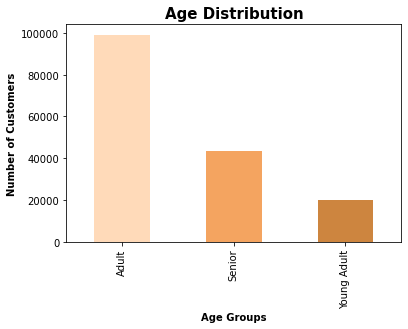

In [86]:
#create a bar chart for age distribution of customers
age_bar=df_unique['age_group'].value_counts().plot.bar(color=['peachpuff', 'sandybrown', 'peru'])
plt.title('Age Distribution', fontweight='bold', fontsize=15)
plt.xlabel('Age Groups', fontweight='bold', fontsize=10)
plt.ylabel('Number of Customers', fontweight= 'bold', fontsize=10)

In [87]:
#export bar chart
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_distribution.png'))

#### b. Parental-Age Profile

Text(0, 0.5, 'Number of Customers')

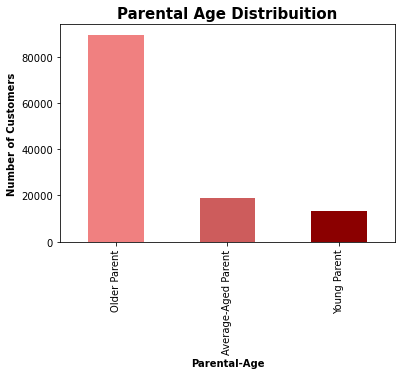

In [88]:
#create a bar chart for parental age distribution of customers
parental_age_bar=df_unique['parental_age'].value_counts().plot.bar(color=['lightcoral', 'indianred', 'darkred'])
plt.title('Parental Age Distribuition', fontweight='bold', fontsize=15)
plt.xlabel('Parental-Age', fontweight='bold', fontsize=10)
plt.ylabel('Number of Customers', fontweight='bold', fontsize=10)

In [89]:
#export bar chart
parental_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parental_age_distribution.png'))

#### c. Single Parent Profile

Text(0, 0.5, 'Number of Customers')

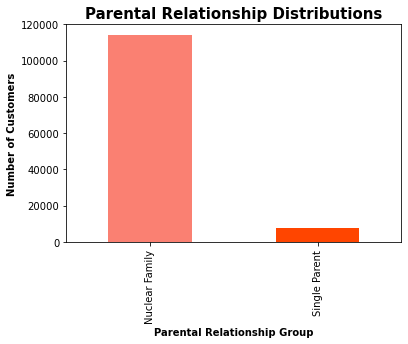

In [90]:
#create bar chart of parental age distribution of customers
parental_relationship_bar= df_unique['parental_relationship_status'].value_counts().plot.bar(color=['salmon', 'orangered'])
plt.title('Parental Relationship Distributions', fontweight='bold', fontsize=15)
plt.xlabel('Parental Relationship Group', fontweight='bold', fontsize=10)
plt.ylabel('Number of Customers', fontweight='bold', fontsize=10)

In [91]:
#export bar chart
parental_relationship_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parental_relationship_distribution.png'))

#### d. Relationship-Age Profile

Text(0, 0.5, 'Number of Customers')

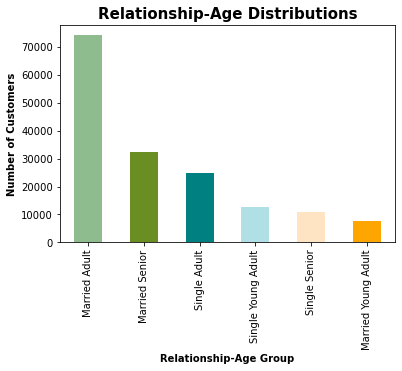

In [92]:
#create a bar chart of relationship-age distribution of customers
relationship_age_bar=df_unique['relationship_age_status'].value_counts().plot.bar(color=['darkseagreen', 'olivedrab', 'teal', 'powderblue', 'bisque', 'orange'])
plt.title('Relationship-Age Distributions', fontweight='bold', fontsize=15)
plt.xlabel('Relationship-Age Group', fontweight='bold', fontsize=10)
plt.ylabel('Number of Customers', fontweight='bold', fontsize=10)

In [93]:
#export bar chart
relationship_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_relationship_age_distribution.png'))

#### e. Income Profile

Text(0, 0.5, 'Number of Customers')

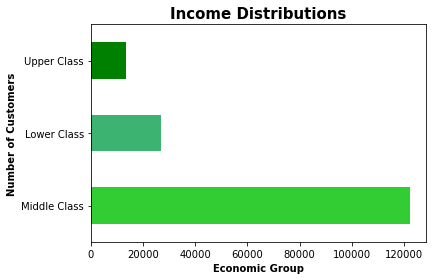

In [94]:
#create bar chart of income distribution of customers
economic_group_bar=df_unique['economic_group'].value_counts().plot.barh(color=['limegreen', 'mediumseagreen', 'green'])
plt.title('Income Distributions', fontweight='bold', fontsize=15)
plt.xlabel('Economic Group', fontweight='bold', fontsize=10)
plt.ylabel('Number of Customers', fontweight='bold', fontsize='10')

In [95]:
#export bar chart
economic_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_distribution.png'))

#### f. Gender Profile

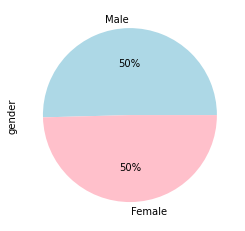

In [96]:
#create a pie chart of gender distribution of customers
labels= ['Male', 'Female']
gender_pie=df_unique['gender'].value_counts().plot.pie(autopct=('%1.f%%'), colors=['lightblue', 'pink'])

In [97]:
#export pie chart
gender_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_gender_distribution.png'))

#### g. Organic Profile

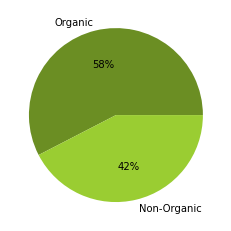

In [199]:
#create a pie chart of organic purchase distributions of customers
organic_pie=df_unique['organic_product'].value_counts(dropna=False).plot.pie(label='', labels=['Organic', 'Non-Organic'], autopct=('%1.f%%'), colors= ['olivedrab', 'yellowgreen'])

In [ ]:
#export pie chart
organic_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_organic_distribution.png'))

# 10. Department Profile Visualizations

#### a. Alcohol Profile

#### 0 means they did not buy alcohol and 1 means that they did buy alcohol

In [100]:
df_unique['alcohol_status'].value_counts()

0    149480
1     13151
Name: alcohol_status, dtype: int64

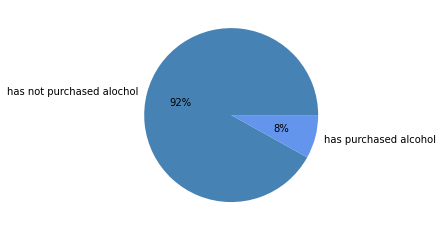

In [101]:
#create a pie chart for customers who have bought alcohol
alcohol_pie=df_unique['alcohol_status'].value_counts().plot.pie(label='', labels=['has not purchased alochol', 'has purchased alcohol'], autopct=('%1.f%%'), colors= ['steelblue', 'cornflowerblue'])

In [102]:
#export pie chart
alcohol_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pei_alcohol_distribution.png'))

#### b. Baby Profile

#### 0 means that they have not purchased baby supplies, and 1 means that they have purchased baby supples

In [103]:
df_unique['baby_status'].value_counts()

0    132401
1     30230
Name: baby_status, dtype: int64

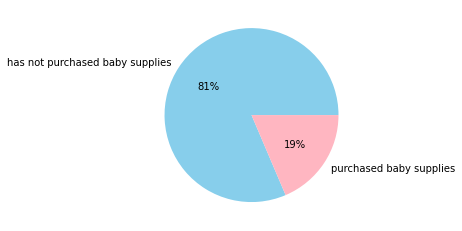

In [104]:
#create a pie chart for customers that have bought baby supplies
baby_pie=df_unique['baby_status'].value_counts().plot.pie(label='', labels= ['has not purchased baby supplies','purchased baby supplies'], autopct=('%1.f%%'), colors= ['skyblue', 'lightpink'])

In [105]:
#export pie chart
baby_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_baby_distribution.png'))

#### c. Pet Profile 

In [106]:
df_unique['pet_status'].value_counts()

0    132401
1     30230
Name: pet_status, dtype: int64

#### 0 means that they have not purchased pet products and 1 means that they have purchased pet products

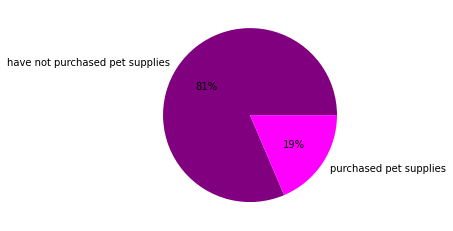

In [107]:
#create a pie chart for customers who have bought pet products
pet_pie=df_unique['pet_status'].value_counts().plot.pie(label='', labels=['have not purchased pet supplies', 'purchased pet supplies'], autopct=('%1.f%%'), colors= ['purple', 'magenta'])

In [108]:
#export pie chart
pet_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_pet_distribution.png'))

# 11. Comparison Visualizations

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### a. Region Distribution

In [109]:
#create crosstab for region and age group
age_region_norm=pd.crosstab(index=df_unique['region'], columns=df_unique['age_group'], normalize='index')
age_region_norm

age_group,Adult,Senior,Young Adult
region,,,
Midwest,0.612310,0.264983,0.122707
North East,0.613240,0.265211,0.121549
South,0.607274,0.266326,0.126400
West,0.608688,0.266821,0.124491


Text(0.5, 0, 'Region')

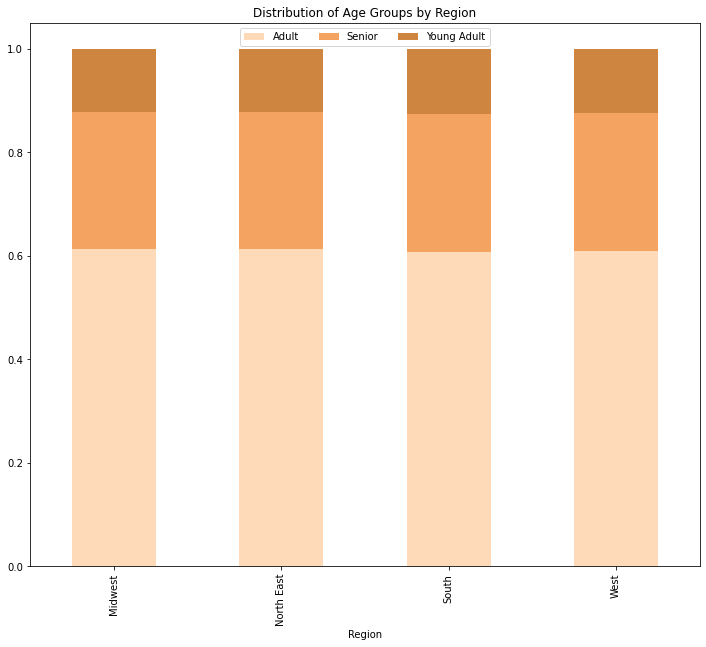

In [110]:
#create a stacked bar chart for age group by region
age_region_stacked=age_region_norm.plot(kind='bar',
                                       stacked= True,
                                       color= ['peachpuff', 'sandybrown', 'peru'],
                                       figsize=(12,10))
plt.title('Distribution of Age Groups by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [111]:
#export stacked bar chart
age_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_age_region.png'))

In [112]:
age_region=pd.crosstab(index=df_unique['region'], columns=df_unique['age_group'])
age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,23498,10169,4709
North East,17527,7580,3474
South,32910,14433,6850
West,25249,11068,5164


Text(0.5, 0, 'Region')

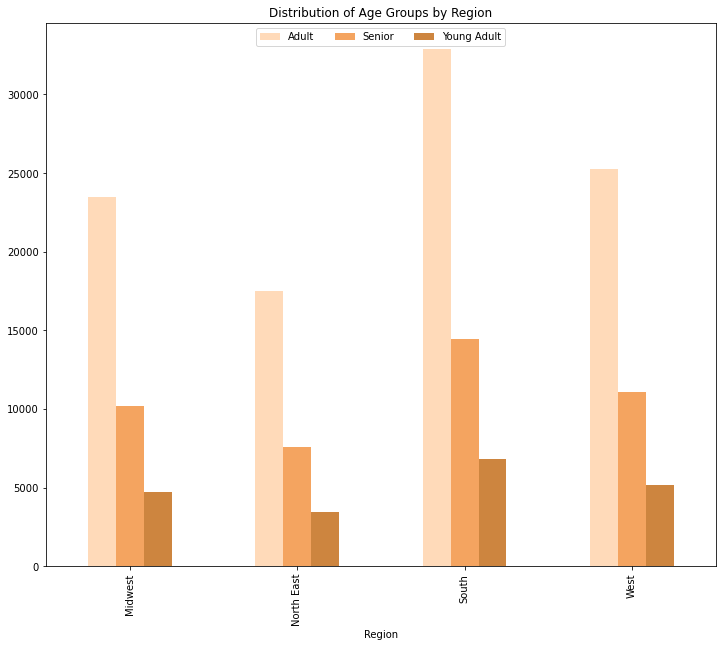

In [113]:
#create a bar chart for age group by region
age_region_bar=age_region.plot(kind='bar',
                              stacked=False,
                              color= ['peachpuff', 'sandybrown', 'peru'],
                              figsize=(12,10))
plt.title('Distribution of Age Groups by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [114]:
#export bar chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

In [115]:
#create a crosstabe for parental_age and region
parental_age_region=pd.crosstab(index=df_unique['region'], columns=df_unique['parental_age'], normalize='index')
parental_age_region

parental_age,Average-Aged Parent,Older Parent,Young Parent
region,,,
Midwest,0.152794,0.737175,0.110031
North East,0.156382,0.739707,0.103911
South,0.153778,0.735193,0.111029
West,0.157849,0.732258,0.109893


Text(0.5, 0, 'Region')

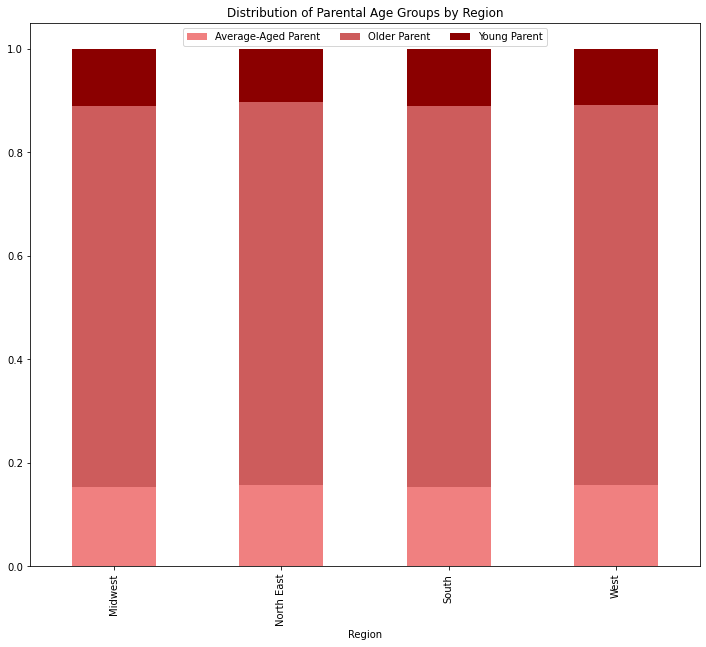

In [116]:
#create a stacked bar chart for parental_age dristributed throughout regions
parental_age_region_stacked=parental_age_region.plot(kind='bar',
                                                    stacked= True,
                                                    color= ['lightcoral', 'indianred', 'darkred'],
                                                    figsize=(12,10))
plt.title('Distribution of Parental Age Groups by Region')
plt.legend(loc='upper center', ncol=4)
plt.xlabel('Region')

In [117]:
#export stacked bar chart
parental_age_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_parental_age_region.png'))

In [118]:
#create a crosstab for parental_relationship by region
parental_relationship_region=pd.crosstab(df_unique['region'], columns=df_unique['parental_relationship_status'], normalize='index')
parental_relationship_region

parental_relationship_status,Nuclear Family,Single Parent
region,,
Midwest,0.936133,0.063867
North East,0.942511,0.057489
South,0.935950,0.064050
West,0.937709,0.062291


Text(0.5, 0, 'Region')

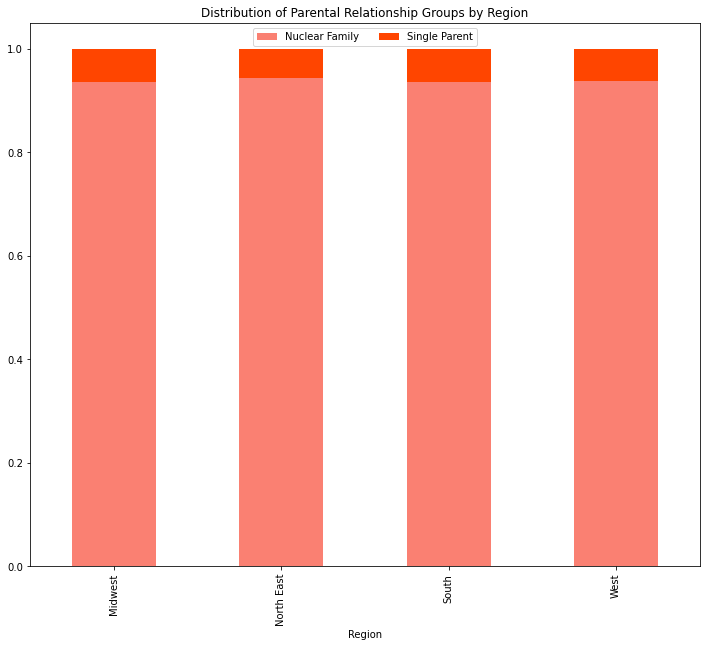

In [119]:
#create stacked bar chart for parental_relationship status by region
parental_relationship_region_stacked=parental_relationship_region.plot(kind='bar',
                                                                      stacked= True,
                                                                      color= ['salmon', 'orangered'],
                                                                      figsize=(12,10))
plt.title('Distribution of Parental Relationship Groups by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [120]:
#export stacked bar chart
parental_relationship_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_parental_relationship_region.png'))

In [121]:
#create crosstab for income groups and region 
income_region=pd.crosstab(index=df_unique['region'], columns=df_unique['economic_group'], normalize='index')
income_region

economic_group,Lower Class,Middle Class,Upper Class
region,,,
Midwest,0.164478,0.752710,0.082812
North East,0.164655,0.752283,0.083062
South,0.165409,0.751149,0.083443
West,0.164822,0.751356,0.083822


Text(0.5, 0, 'Region')

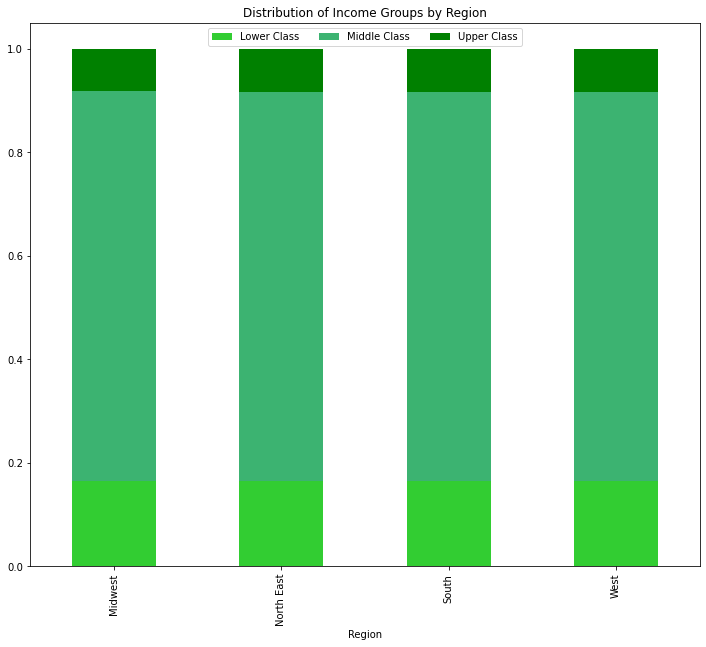

In [122]:
#create a stacked bar chart for income groups by region
income_region_stacked=income_region.plot(kind='bar',
                                        stacked=True,
                                        color=['limegreen', 'mediumseagreen', 'green'],
                                        figsize=(12,10))
plt.title('Distribution of Income Groups by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [123]:
#export stacked bar chart
income_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_income_region.png'))

In [124]:
#create crosstab for genders and regions
gender_region=pd.crosstab(index=df_unique['region'], columns=df_unique['gender'], normalize='index')
gender_region

gender,Female,Male
region,,
Midwest,0.498254,0.501746
North East,0.489731,0.510269
South,0.495784,0.504216
West,0.497746,0.502254


Text(0.5, 0, 'Region')

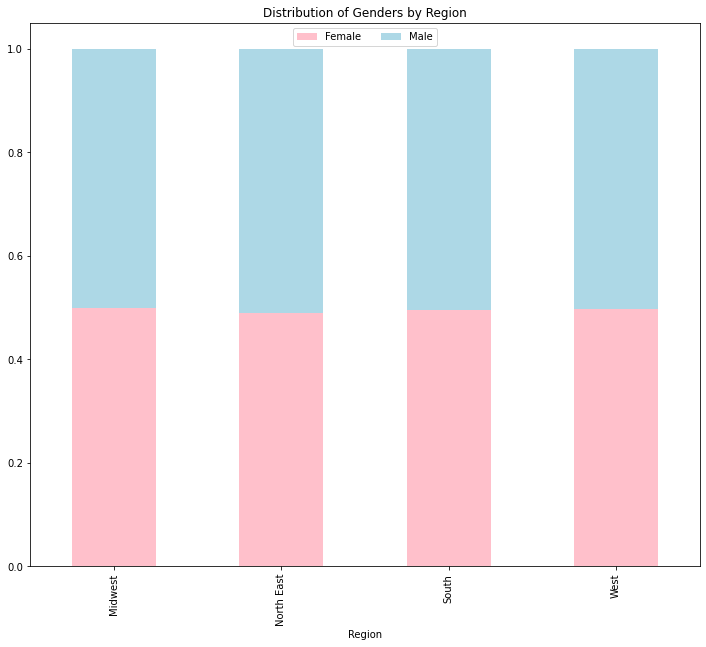

In [125]:
#create a stacked bar chart for genders by region
gender_region_stacked=gender_region.plot(kind='bar',
                                        stacked=True,
                                        color= ['pink', 'lightblue'],
                                        figsize=(12,10))
plt.title('Distribution of Genders by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [126]:
#export stacked bar chart
gender_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_gender_region.png'))

In [127]:
#create crosstab for relationship_age and region
relationship_age_region=pd.crosstab(index=df_unique['region'], columns=df_unique['relationship_age_status'], normalize='index')
relationship_age_region

relationship_age_status,Married Adult,Married Senior,Married Young Adult,Single Adult,Single Senior,Single Young Adult
region,,,,,,
Midwest,0.457291,0.200724,0.044768,0.155019,0.064259,0.077939
North East,0.460236,0.197334,0.045695,0.153004,0.067877,0.075855
South,0.455539,0.200487,0.046131,0.151735,0.065839,0.080269
West,0.455148,0.201032,0.047130,0.153540,0.065789,0.077361


Text(0.5, 0, 'Region')

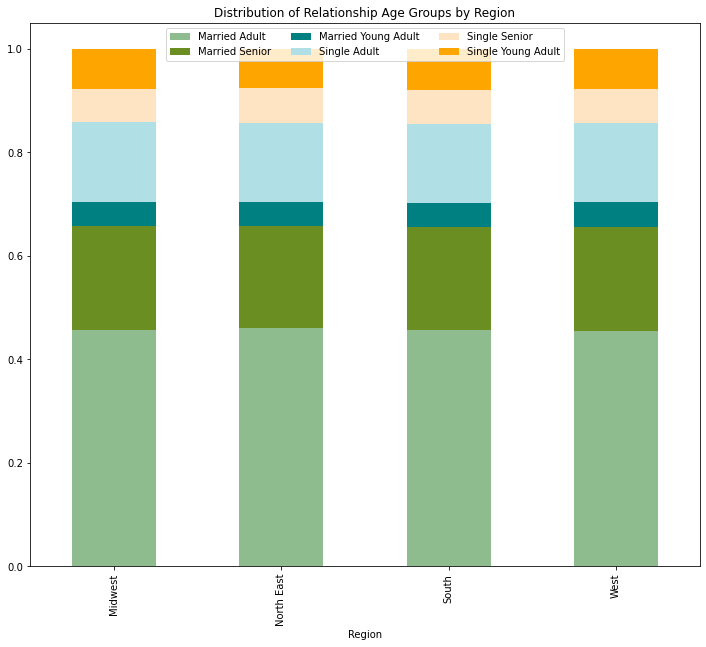

In [128]:
#create stacked bar chart for relationship_age by region
relationship_age_region_stacked=relationship_age_region.plot(kind='bar',
                                                           stacked=True,
                                                           color=['darkseagreen', 'olivedrab', 'teal', 'powderblue', 'bisque', 'orange'],
                                                           figsize=(12,10))
plt.title('Distribution of Relationship Age Groups by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [129]:
#export stacked bar chart
relationship_age_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_relationship_age_region.png'))

In [130]:
#creating crosstab for product price range and regions
price_range_region=pd.crosstab(index=df_unique['region'], columns=df_unique['price_range_loc'], normalize='index')
price_range_region

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,0.000573,0.293413,0.706014
North East,0.000700,0.295196,0.704104
South,0.000720,0.294817,0.704464
West,0.000699,0.294014,0.705287


Text(0.5, 0, 'Region')

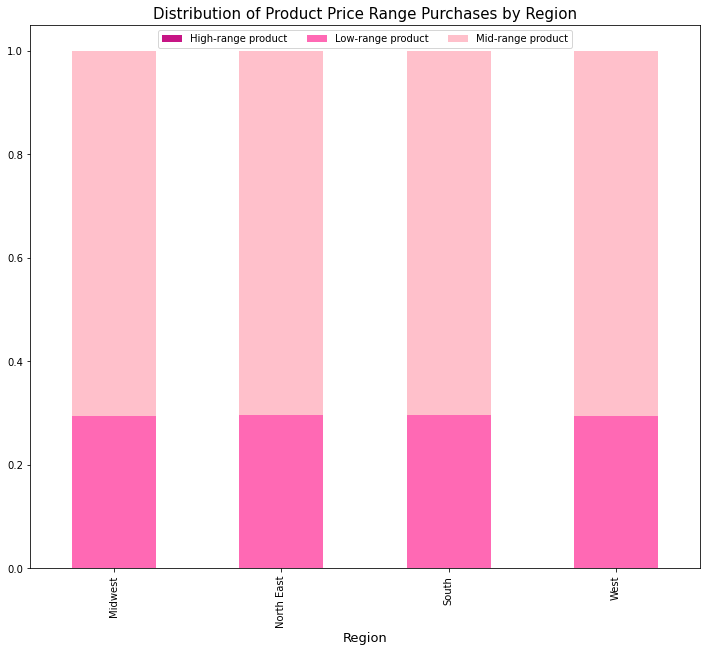

In [169]:
#create stacked bar chart for product price range by region
price_range_region_stacked=price_range_region.plot(kind='bar',
                                                  stacked=True,
                                                  color=['mediumvioletred', 'hotpink', 'pink'],
                                                  figsize=(12,10))
plt.title('Distribution of Product Price Range Purchases by Region', fontsize=15)
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region', fontsize=13)

In [170]:
#export stacked bar chart
price_range_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_price_range_region.png'))

In [133]:
#create a crosstab for customer loyalty and region
loyalty_region=pd.crosstab(index=df_unique['region'], columns=df_unique['loyalty_flag'], normalize='index')
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.103997,0.421878,0.474124
North East,0.105910,0.422029,0.472062
South,0.104017,0.423431,0.472552
West,0.105157,0.423109,0.471734


Text(0.5, 0, 'Region')

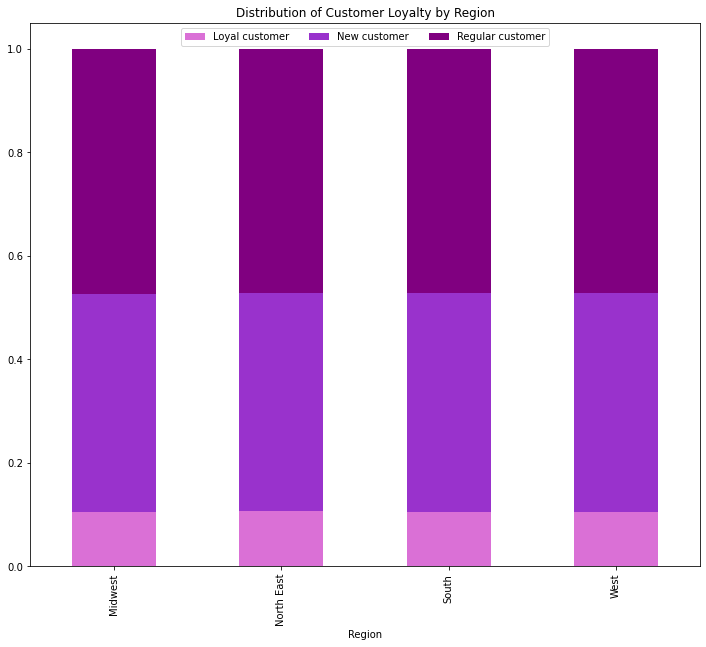

In [134]:
#create stacked bar chart for customer loyalty by region
loyalty_region_stacked=loyalty_region.plot(kind='bar',
                                          stacked=True,
                                          color=['orchid', 'darkorchid', 'purple'],
                                          figsize=(12,10))
plt.title('Distribution of Customer Loyalty by Region')
plt.legend(loc='upper center', ncol=4)
plt.xlabel('Region')

In [135]:
#export stacked bar chart
loyalty_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_region.png'))

In [136]:
#create crosstab for customer spending groups and region
spending_region=pd.crosstab(index=df_unique['region'], columns=df_unique['spending_flag'], normalize='index')
spending_region

spending_flag,High spender,Low spender
region,,
Midwest,0.023009,0.976991
North East,0.021448,0.978552
South,0.023232,0.976768
West,0.022806,0.977194


Text(0.5, 0, 'Region')

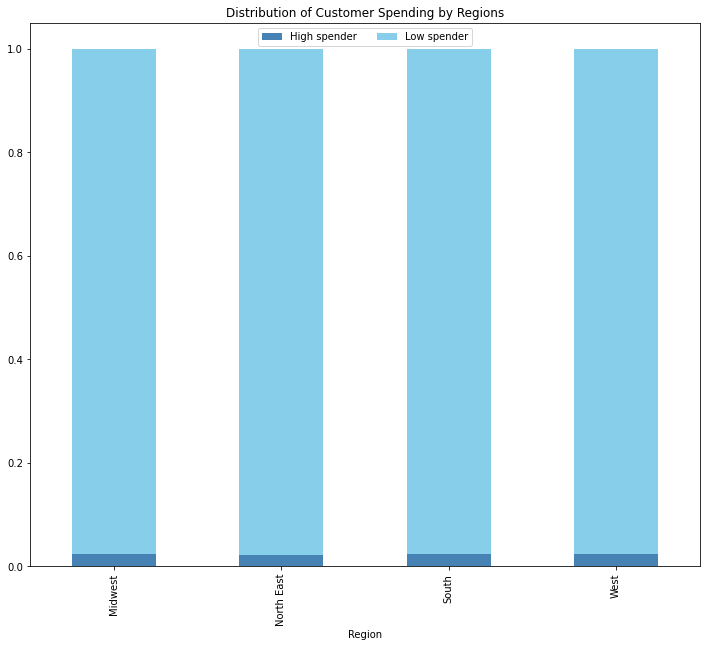

In [137]:
#create stacked bar chart for customer spending by region
spending_region_stacked=spending_region.plot(kind='bar',
                                              stacked=True,
                                              color=['steelblue', 'skyblue'],
                                              figsize=(12,10))
plt.title('Distribution of Customer Spending by Regions')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [138]:
#export stacked bar chart
spending_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_spending_region.png'))

In [139]:
#create crosstab for customer order frequency and region
order_frequency_region=pd.crosstab(index=df_unique['region'], columns=df_unique['order_frequency_flag'], normalize='index')
order_frequency_region

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,0.463675,0.227825,0.308500
North East,0.466919,0.221301,0.311781
South,0.467108,0.226542,0.306350
West,0.469468,0.224681,0.305851


Text(0.5, 0, 'Region')

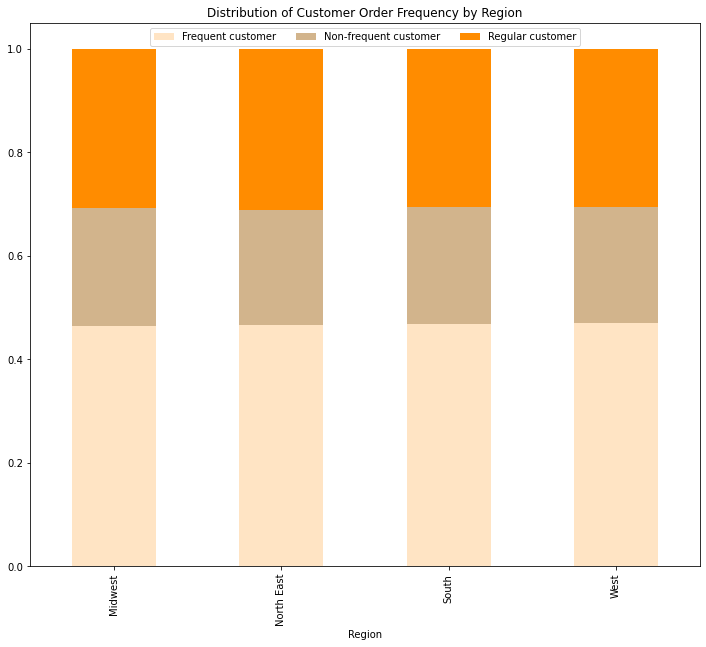

In [140]:
#create crosstab for customer order frequency by region
order_frequency_region_stacked=order_frequency_region.plot(kind='bar',
                                                          stacked=True,
                                                          color= ['bisque', 'tan', 'darkorange'],
                                                          figsize=(12,10))
plt.title('Distribution of Customer Order Frequency by Region')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Region')

In [141]:
#export stacked bar chart
order_frequency_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_order_frequency_region.png'))

In [142]:
#create crosstab for departments and regions
dept_region=pd.crosstab(index=df_unique['department'], columns=df_unique['region'], normalize='index')
dept_region

region,Midwest,North East,South,West
department,,,,
alcohol,0.229839,0.169355,0.342742,0.258065
babies,0.200000,0.133333,0.355556,0.311111
bakery,0.254697,0.154489,0.338205,0.252610
beverages,0.231102,0.173120,0.338414,0.257364
breakfast,0.223787,0.175274,0.352113,0.248826
canned goods,0.234414,0.162095,0.306733,0.296758
dairy eggs,0.237340,0.179427,0.330198,0.253035
deli,0.245208,0.168391,0.332368,0.254034
dry goods pasta,0.235772,0.178862,0.325203,0.260163


Text(0.5, 0, 'Department')

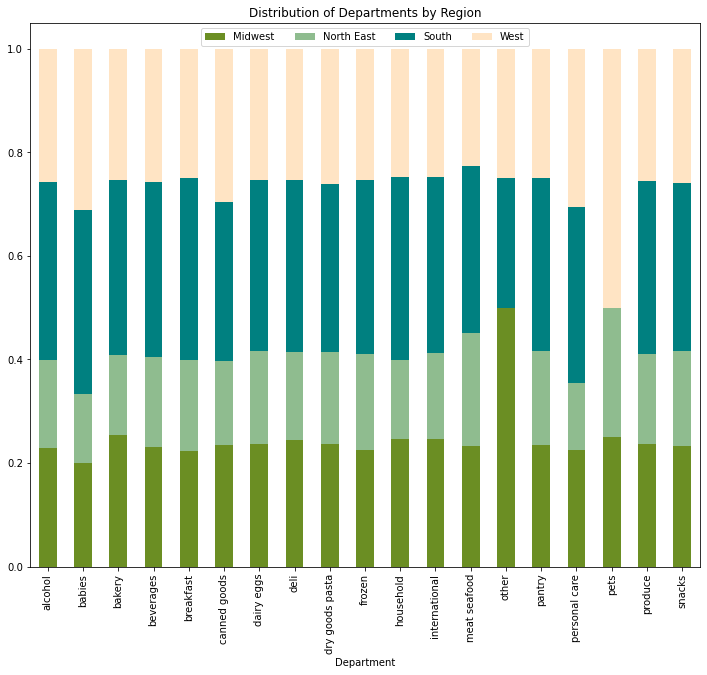

In [143]:
#create stacked bar chart for departments by region
dept_region_stacked=dept_region.plot(kind='bar',
                                    stacked=True,
                                    color=['olivedrab', 'darkseagreen', 'teal', 'bisque'],
                                    figsize=(12,10))
plt.title('Distribution of Departments by Region')
plt.legend(loc='upper center', ncol=4)
plt.xlabel('Department')

In [144]:
#export stacked bar chart
dept_region_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_department_region.png'))

#### b. Order Frequency Distribution

In [145]:
#create a crosstab for age and order frequency
age_order_freq=pd.crosstab(index=df_unique['age_group'], columns=df_unique['order_frequency_flag'], normalize='index')
age_order_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,0.465700,0.226881,0.307419
Senior,0.468948,0.222613,0.308439
Young Adult,0.468139,0.224489,0.307372


Text(0.5, 0, 'Age Group')

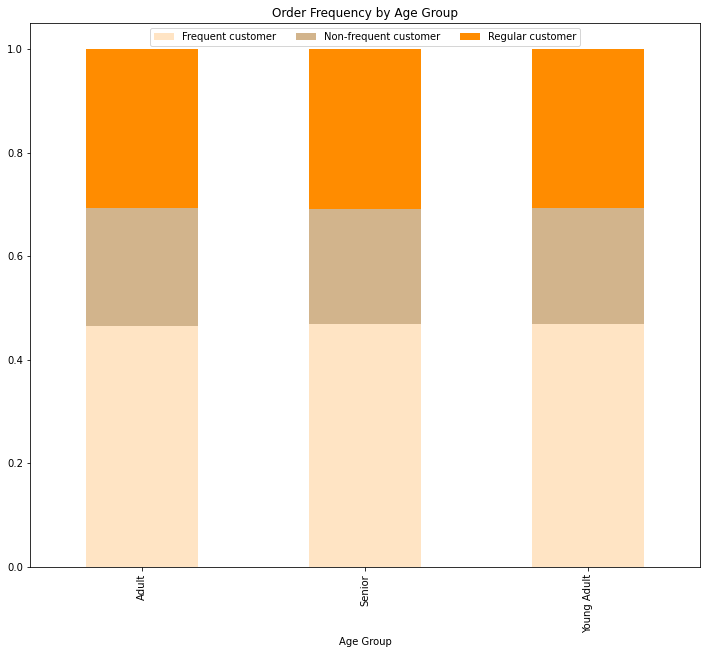

In [146]:
#create stacked bar chart for order frequency by age group
age_order_freq_stacked=age_order_freq.plot(kind='bar',
                                          stacked=True,
                                          color=['bisque', 'tan', 'darkorange'],
                                          figsize=(12,10))
plt.title('Order Frequency by Age Group')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Age Group')


In [147]:
#export stacked bar chart
age_order_freq_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_age_order_freq.png'))

In [148]:
#create crosstab for family status and order frequency
family_order_freq=pd.crosstab(index=df_unique['family_status'], columns=df_unique['order_frequency_flag'], normalize='index')
family_order_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status,,,
divorced/widowed,0.471188,0.220808,0.308004
living with parents and siblings,0.475289,0.227261,0.297450
married,0.467252,0.225642,0.307106
single,0.460626,0.226502,0.312872


Text(0.5, 0, 'Family Status')

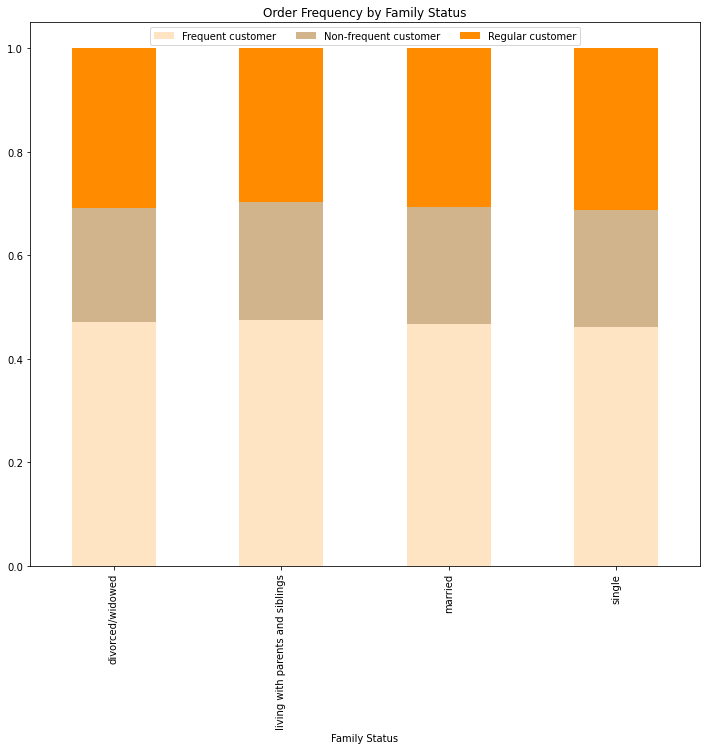

In [149]:
#create a stacked bar chart for order frequency by family status
family_order_freq_stacked=family_order_freq.plot(kind='bar',
                                                stacked=True,
                                                color=['bisque', 'tan', 'darkorange'],
                                                figsize=(12,10))
plt.title('Order Frequency by Family Status')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Family Status')

In [150]:
#export stacked bar chart
family_order_freq_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_family_order_freq.png'))

In [151]:
#create a crosstab for income and order frequency
income_order_freq=pd.crosstab(index=df_unique['economic_group'], columns=df_unique['order_frequency_flag'], normalize='index')
income_order_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
economic_group,,,
Lower Class,0.423506,0.264104,0.312390
Middle Class,0.474133,0.218892,0.306974
Upper Class,0.487123,0.208103,0.304775


Text(0.5, 0, 'Income Group')

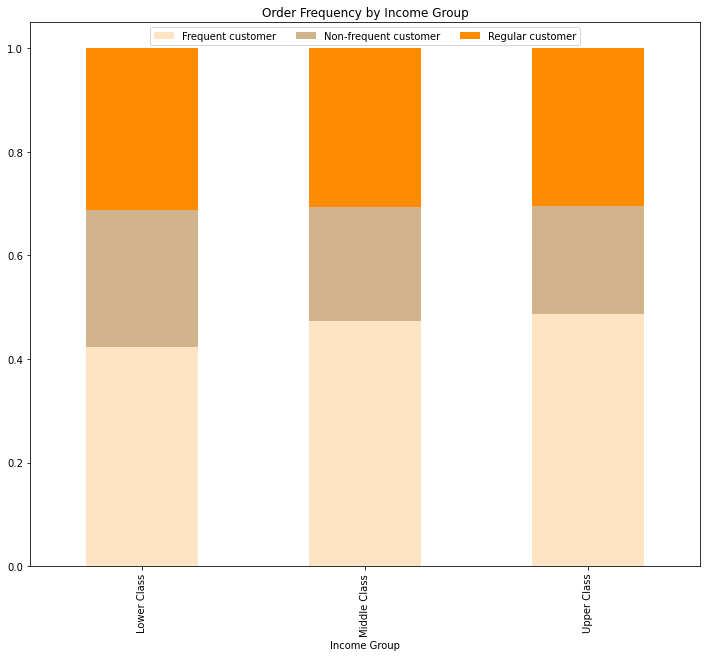

In [152]:
#create stacked bar chart of order frequency by income
income_order_freq_stacked=income_order_freq.plot(kind='bar',
                                                stacked=True,
                                                color=['bisque', 'tan', 'darkorange'],
                                                figsize=(12,10))
plt.title('Order Frequency by Income Group')
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Income Group')

In [153]:
#export stacked bar chart
income_order_freq_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_income_order_freq.png'))

#### c. Price Range Distribution

In [154]:
#create a crosstab for customer loyalty and price range
loyalty_price_range=pd.crosstab(index=df_unique['price_range_loc'], columns=df_unique['loyalty_flag'], normalize='index')
loyalty_price_range

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High-range product,0.009091,0.763636,0.227273
Low-range product,0.084479,0.446292,0.469229
Mid-range product,0.113143,0.412574,0.474283


Text(0.5, 0, 'Product Price Range')

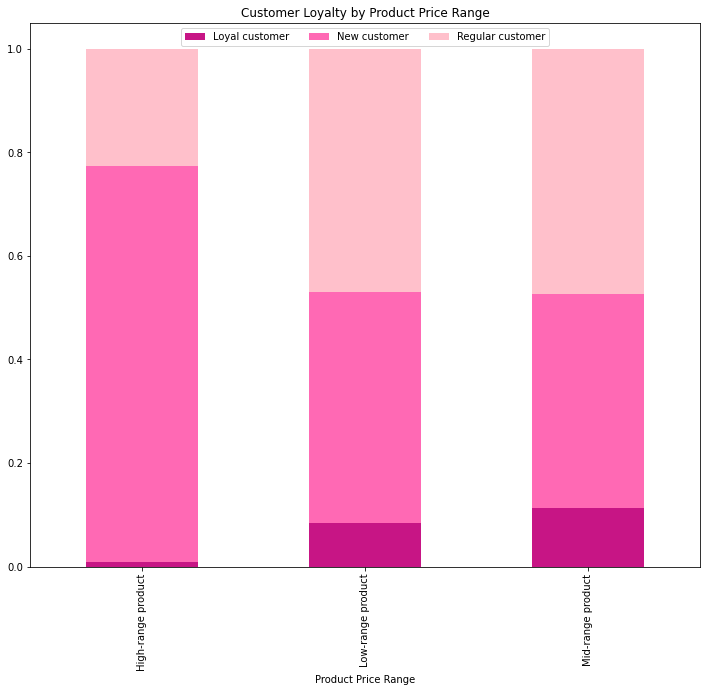

In [155]:
#create a stacked bar chart of customer loyalty by price range
loyalty_price_range_stacked=loyalty_price_range.plot(kind='bar',
                                                    stacked=True,
                                                    color=['mediumvioletred', 'hotpink', 'pink'],
                                                    figsize=(12,10))
plt.title('Customer Loyalty by Product Price Range', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Product Price Range')

In [156]:
#export stacked bar chart
loyalty_price_range_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_price_range.png'))

In [190]:
#create a crosstab for age and price range
age_price_range=pd.crosstab(index=df_unique['age_group'], columns=df_unique['price_range_loc'], normalize='index')
age_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
age_group,,,
Adult,0.000706,0.294886,0.704408
Senior,0.000740,0.294590,0.704671
Young Adult,0.000396,0.291182,0.708422


Text(0.5, 0, 'Product Price Range')

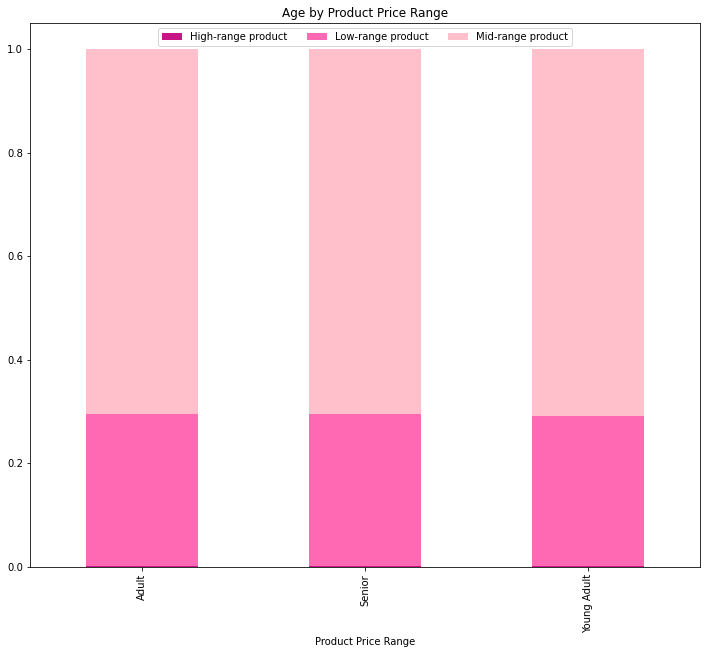

In [191]:
#create a stacked bar chart of age by price range
age_price_range_stacked=age_price_range.plot(kind='bar',
                                                    stacked=True,
                                                    color=['mediumvioletred', 'hotpink', 'pink'],
                                                    figsize=(12,10))
plt.title('Age by Product Price Range', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Product Price Range')

In [195]:
#export bar graph
age_price_range_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_age_price_range.png'))

In [192]:
#create a crosstab for family status and price range
family_stat_price_range=pd.crosstab(index=df_unique['family_status'], columns=df_unique['price_range_loc'], normalize='index')
family_stat_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
family_status,,,
divorced/widowed,0.000578,0.289784,0.709638
living with parents and siblings,0.000657,0.293113,0.706230
married,0.000665,0.295172,0.704163
single,0.000781,0.293538,0.705681


Text(0.5, 0, 'Product Price Range')

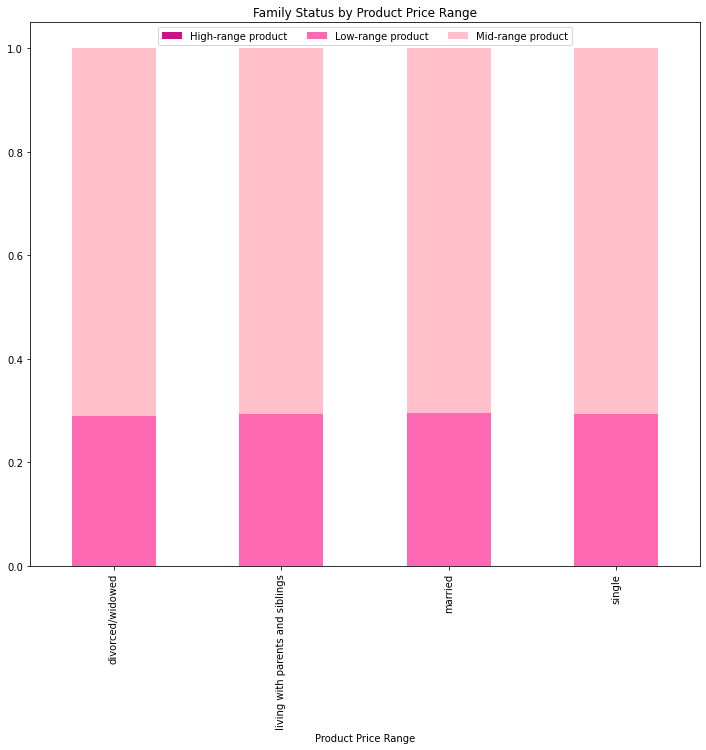

In [193]:
#create a stacked bar chart of age by price range
family_stat_price_range_stacked=family_stat_price_range.plot(kind='bar',
                                                    stacked=True,
                                                    color=['mediumvioletred', 'hotpink', 'pink'],
                                                    figsize=(12,10))
plt.title('Family Status by Product Price Range', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.xlabel('Product Price Range')

In [194]:
#export bar graph
family_stat_price_range_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_family_stat_price_range.png'))

# 12. Basic Visualizations

#### a. Departments

<AxesSubplot:>

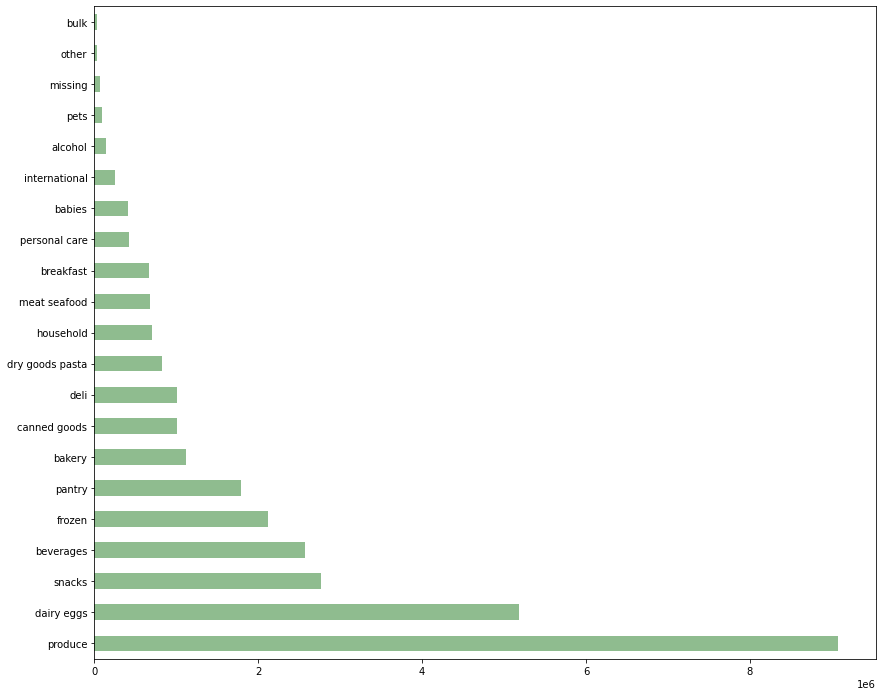

In [157]:
#create a bar chart for orders made in each department
department_bar=active['department'].value_counts().plot(kind='barh', color=['darkseagreen'], figsize=(14,12))
department_bar

In [158]:
#export bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

#### b. Product Price Ranges

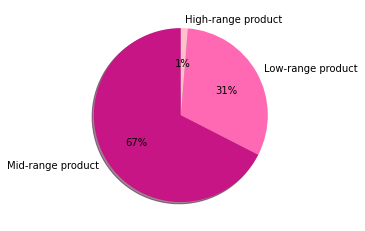

In [179]:
#create pie chart for product price range distribution
price_pie=active['price_range_loc'].value_counts().plot.pie(shadow=True,
                                                            startangle=90,
                                                            autopct=('%1.f%%'),
                                                            colors=['mediumvioletred', 'hotpink', 'pink'],
                                                            label='')

In [160]:
#export pie chart
price_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

#### c. Customer Loyalty

In [205]:
df_unique['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

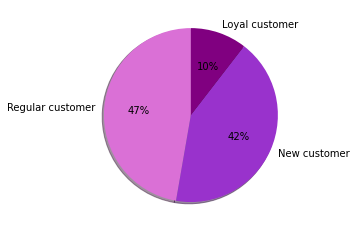

In [203]:
#create pie chart for customer loyalty distribution
loyalty_pie=df_unique['loyalty_flag'].value_counts().plot.pie(shadow=True,
                                                            startangle=90,
                                                            autopct=('%1.f%%'),
                                                            colors=['orchid', 'darkorchid', 'purple'],
                                                            label='')

In [204]:
#export pie chart
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

#### d. Customer Spending 

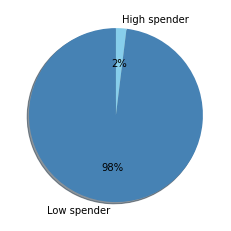

In [162]:
#create pie chart for customer spending distribution
customer_pie=active['spending_flag'].value_counts().plot.pie(shadow=True,
                                                            startangle=90,
                                                            autopct=('%1.f%%'),
                                                            colors=['steelblue', 'skyblue'],
                                                            label='')

In [206]:
#export pie chart
customer_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_customer_spending.png'))

#### e. Order Frequency 

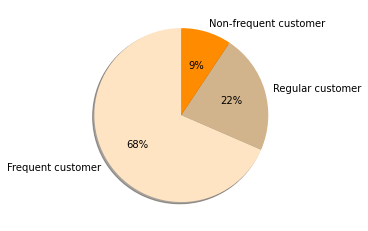

In [163]:
#create pie chart for order frequency distribution
order_freq_pie=active['order_frequency_flag'].value_counts().plot.pie(shadow=True,
                                                                     startangle=90,
                                                                     autopct=('%1.f%%'),
                                                                     colors=['bisque', 'tan', 'darkorange'],
                                                                     label='')

In [207]:
#export pie chart
order_freq_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_order_frequency.png'))

# 13. Exporting Final Dataset

In [208]:
#export final dataset of active customers
active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_instacart_data.pkl'))

In [209]:
#export final dataset of unique customers
df_unique.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'unique_customers_dataset.pkl'))